# CreditCard Users Churn Prediction
**Author:** Aidos Utegulov<br />
**Cohort:** Feb 21

# Problem Statement:
The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve their services so that customers do not renounce their credit cards

## Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

## Data Dictionary:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

## Import necessary libraries

In [98]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

## Load and view the dataset


In [2]:
data = pd.read_csv("BankChurners.csv")

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [4]:
data.shape

(10127, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations**
- There are 21 columns in the dataset, of which 15 are of numeric and 6 are of type object
- There seem to be no columns containing null values, but we still need to further explore this

**Let's check the number of unique values in each column**

In [6]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- We can drop the column - `CLIENTNUM` as it is unique for each customer and will not add value to the model.
- Some of the numeric columns have repeating values like Credit_Limit, Total_Revolving_Bal. Also some of these columns contain zeros, which needs further exploration.

In [7]:
data.drop(columns = ['CLIENTNUM'], inplace = True)

**Summary of the data**

In [8]:
data.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

- Age varies between 26 and 73
- There are clear outliers in some columns, e.g. Credit_Limit, Avg_Open_To_Buy

**Let's check the count of each unique category in each of the categorical variables.** 

In [9]:
cat_cols = data.select_dtypes(['object'])

In [10]:
cat_cols.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [11]:
# Printing number of count of each unique value in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


**Observations**
- There are 'Unknown' categories in the Marital_Status and Education_Level columns, we can either treat it or leave it as is
- The Attrition_Flag column must be treated to substitute 0's and 1's for the values 'Existing Customer' and 'Attrited Customer' respectively
- Income_Category column needs some kind of preprocessing

In [12]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- There are no null values

## EDA

### Univariate

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

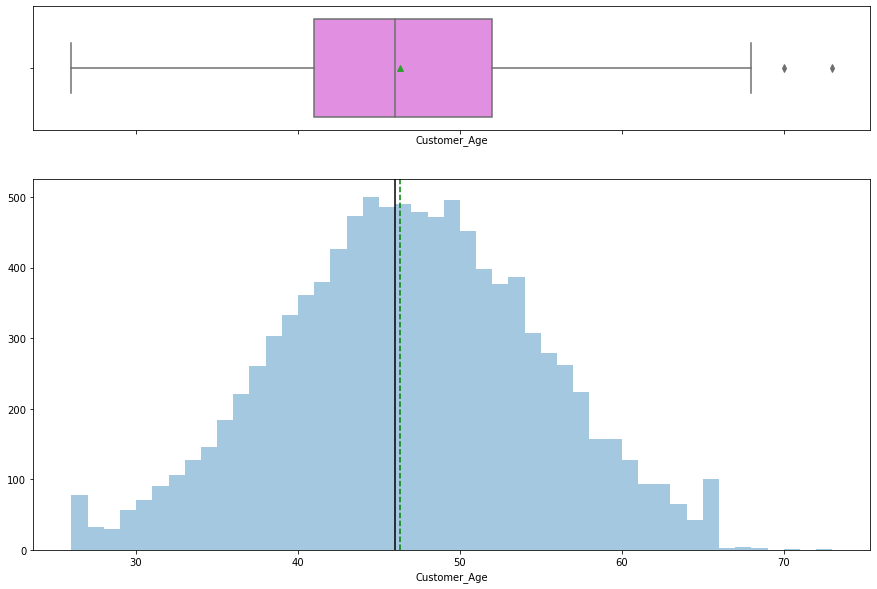

In [14]:
# Observations on Customer_age
histogram_boxplot(data["Customer_Age"])

- As per the boxplot, there are no outliers in the 'Customer_Age' variable
- Age has a fairly normal distribution with approx equal mean and median

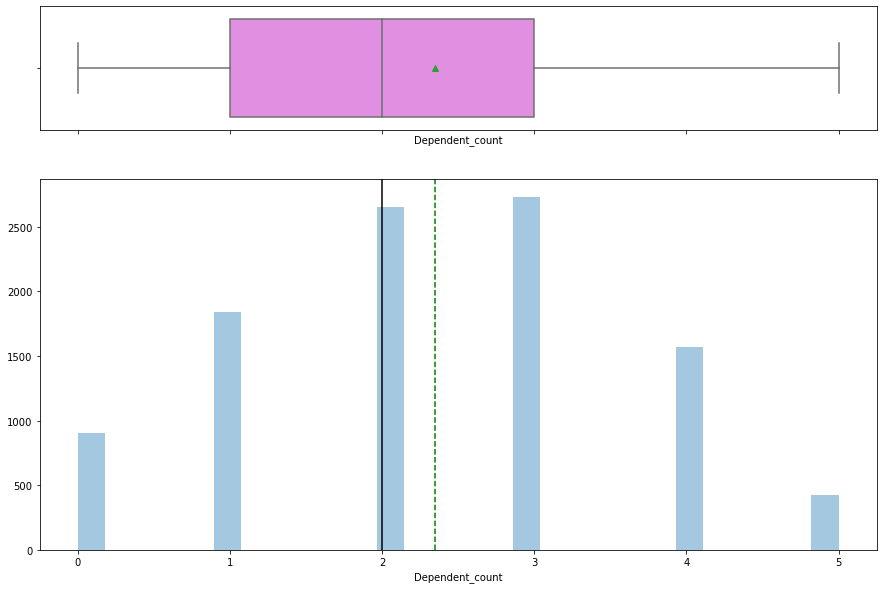

In [15]:
# observations on Dependent_count
histogram_boxplot(data["Dependent_count"])

- The Dependent_count column has somewhat normal distribution of values with mean and median off by a small value
- There are no outliers

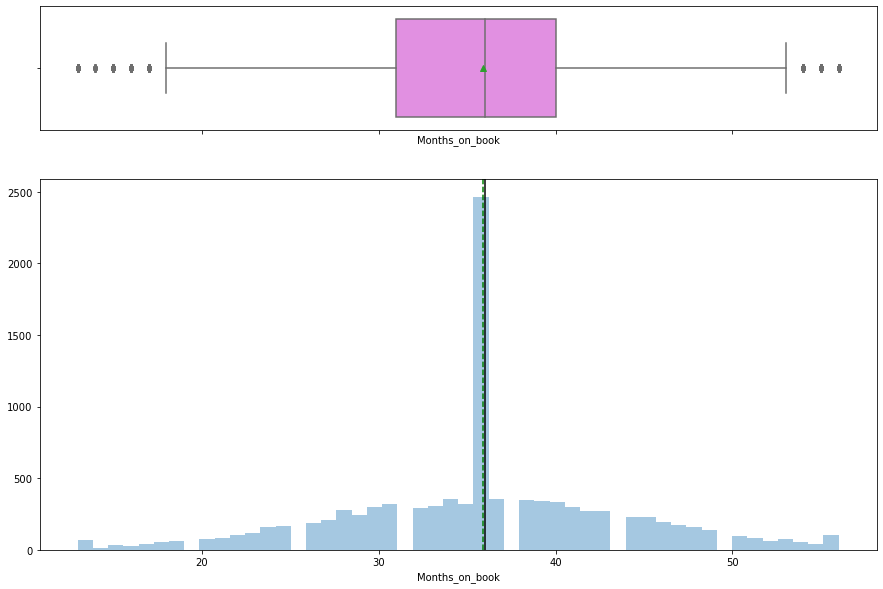

In [16]:
# observations on Months_on_book
histogram_boxplot(data["Months_on_book"])

- Months_on_book seems to have normal distribution of values, with mean and median being approximately equal
- There are no outliers in the column

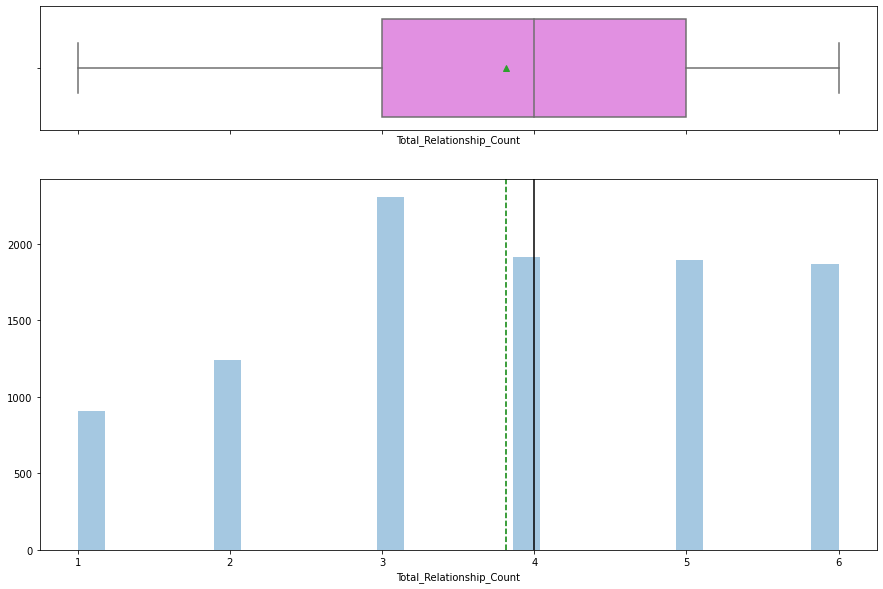

In [17]:
# observations on Total_Relationship_Count
histogram_boxplot(data["Total_Relationship_Count"])

- Total_Relationship_Count seems to have normal distribution of values
- There are no outliers and the mean and median are off by a small amount

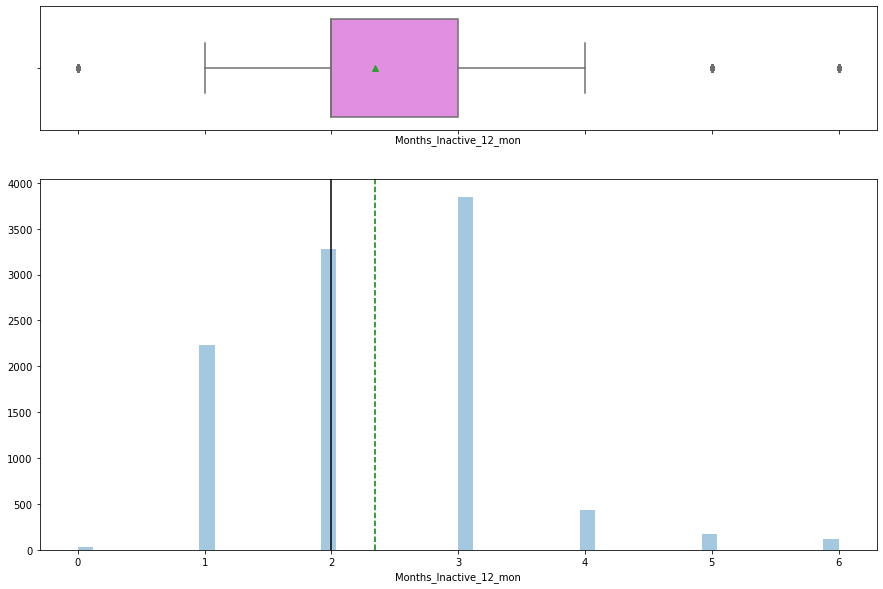

In [18]:
# observations on Months_Inactive_12_mon
histogram_boxplot(data["Months_Inactive_12_mon"])

- Months_Inactive_12_mon has some outlier values and is skewed to the right

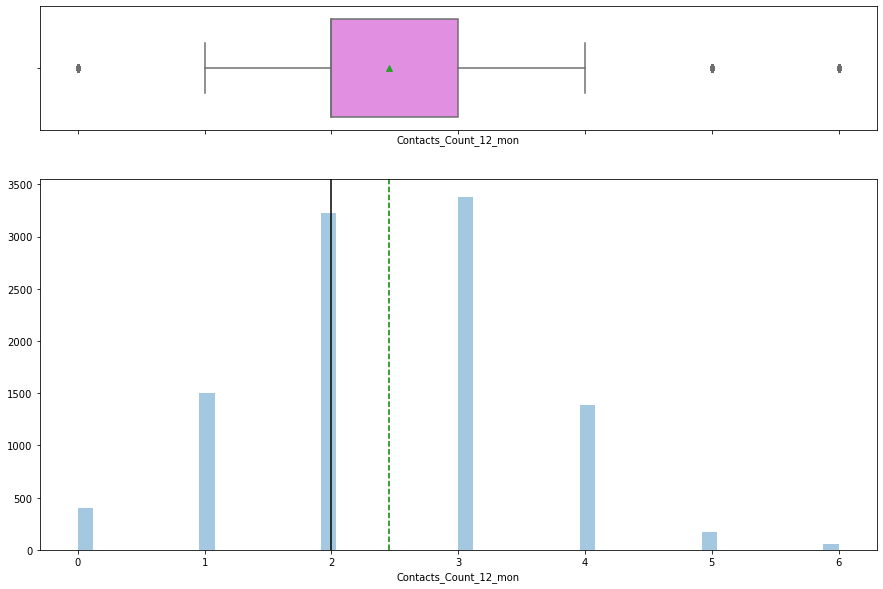

In [19]:
# observations on Contacts_Count_12_mon
histogram_boxplot(data["Contacts_Count_12_mon"])

- Distribution of valuees seems uniform
- There are some outliers in the feature

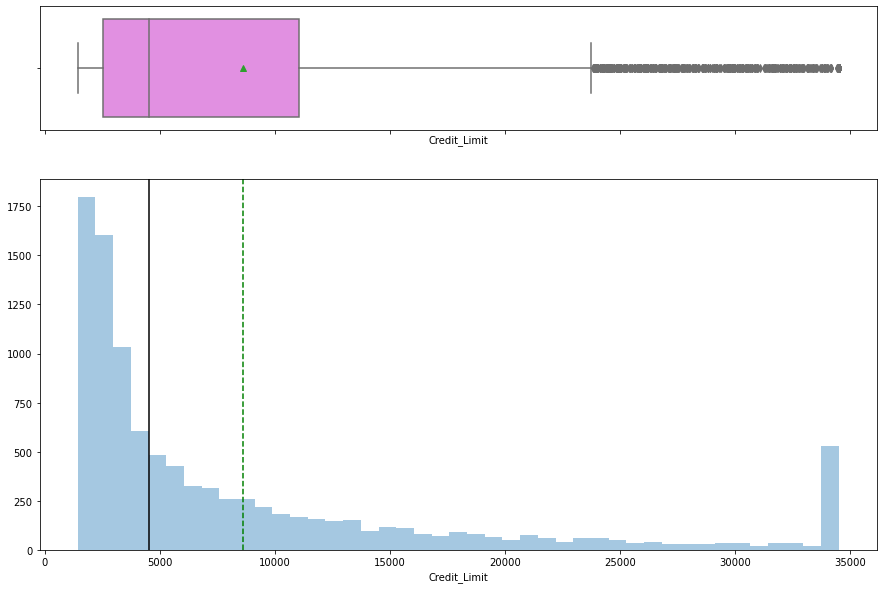

In [20]:
# observations on Credit_Limit
histogram_boxplot(data["Credit_Limit"])

- There seem to be quite a few outliers, data is skewed to the right

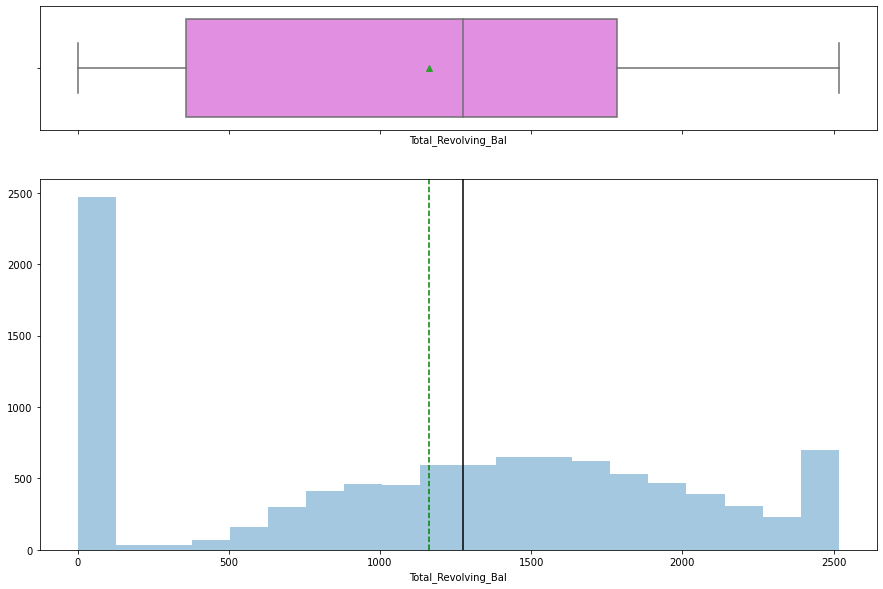

In [21]:
# observations on Total_Revolving_Bal
histogram_boxplot(data["Total_Revolving_Bal"])

- Data seem to be more or less uniform, no outliers detected
- There is some left skewness

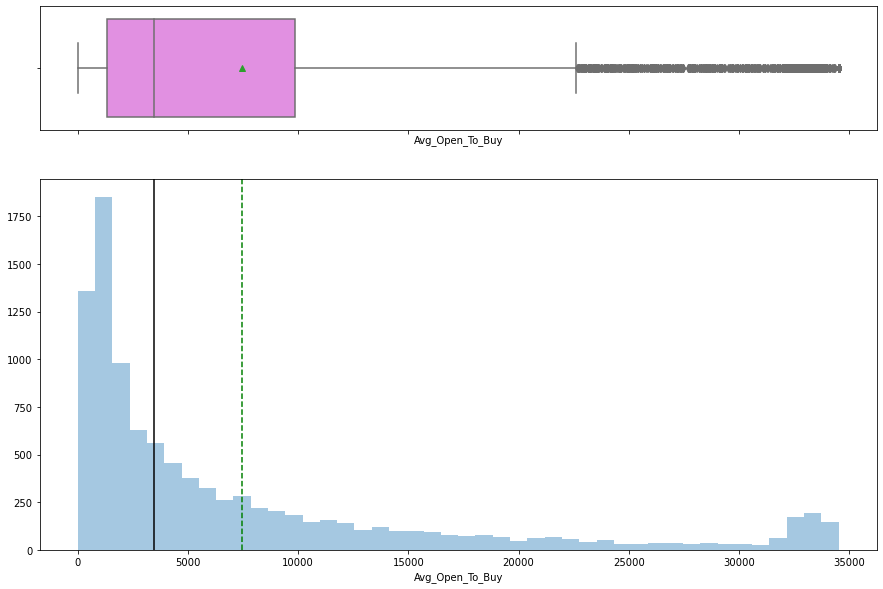

In [22]:
# observations on Avg_Open_To_Buy
histogram_boxplot(data["Avg_Open_To_Buy"])

- Data is skewed to the right
- There is a substantial number of outliers that need to be treated

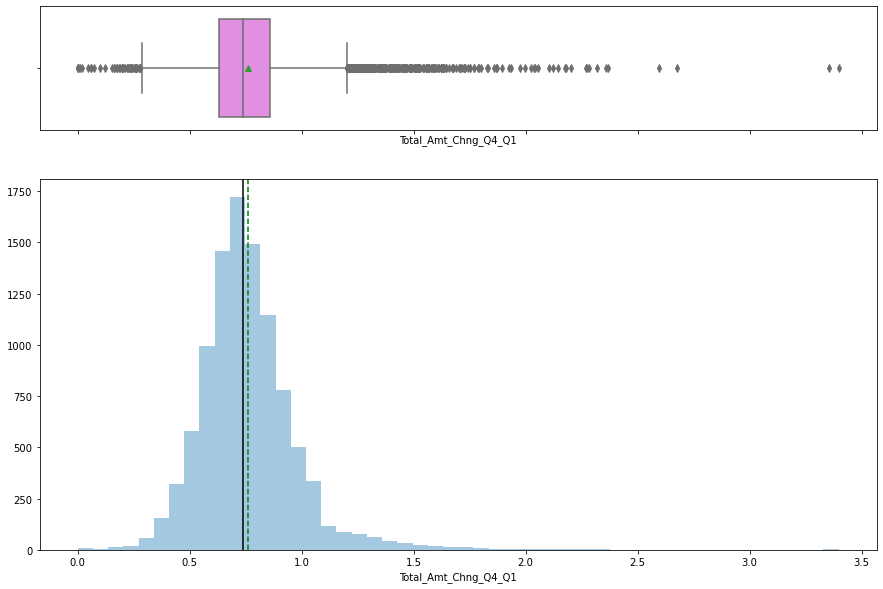

In [23]:
# observations on Avg_Open_To_Buy
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

- There are a log of outliers to the right and to the left

**Observations on Total transaction amount and Total transaction count columns**

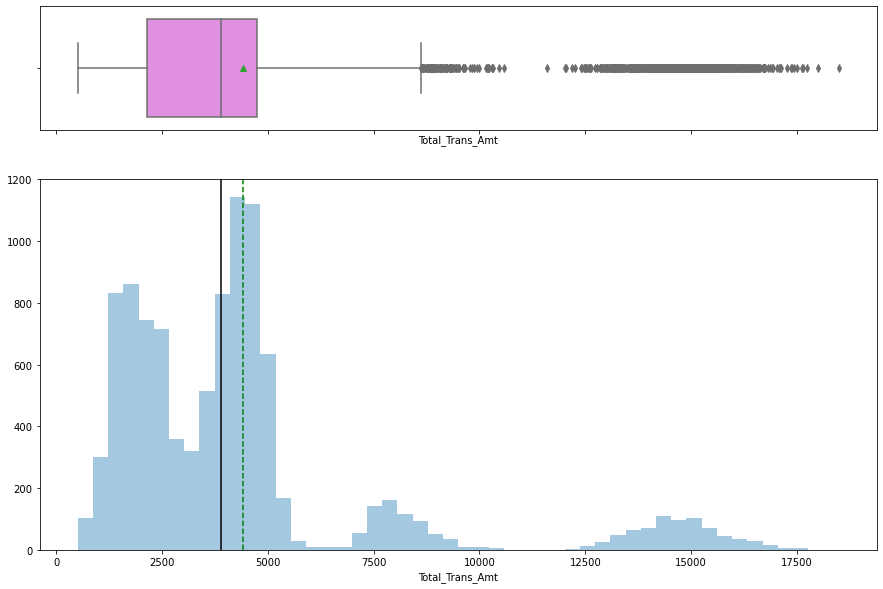

In [24]:
# observations on Total_Trans_Amt
histogram_boxplot(data["Total_Trans_Amt"])

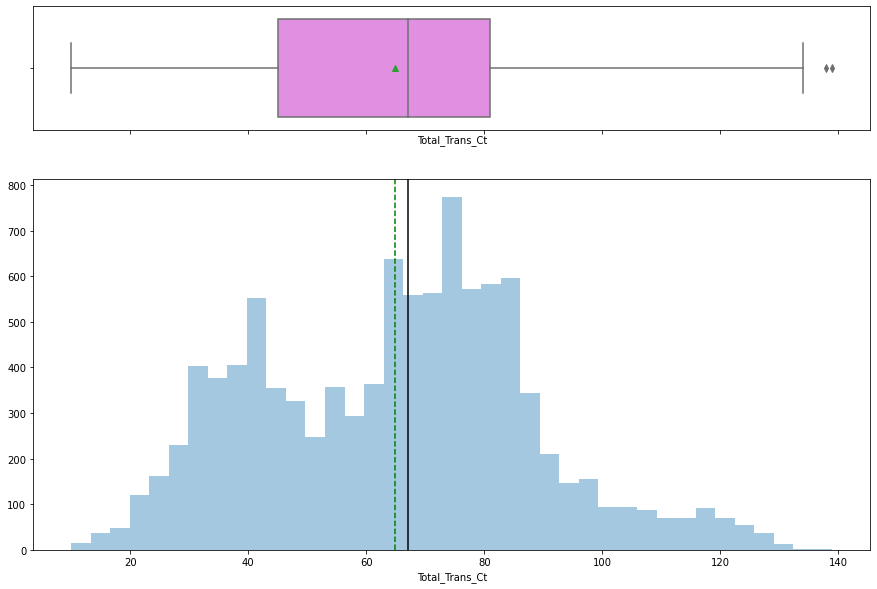

In [25]:
# observations on Total_Trans_Ct
histogram_boxplot(data["Total_Trans_Ct"])

- there is a substantial number of outliers to the left of the mean in the Total_Trans_Amt column
- Total_Trans_Ct column values seem to be uniformly distributed
- There are no outliers in the Total_Trans_Ct columns

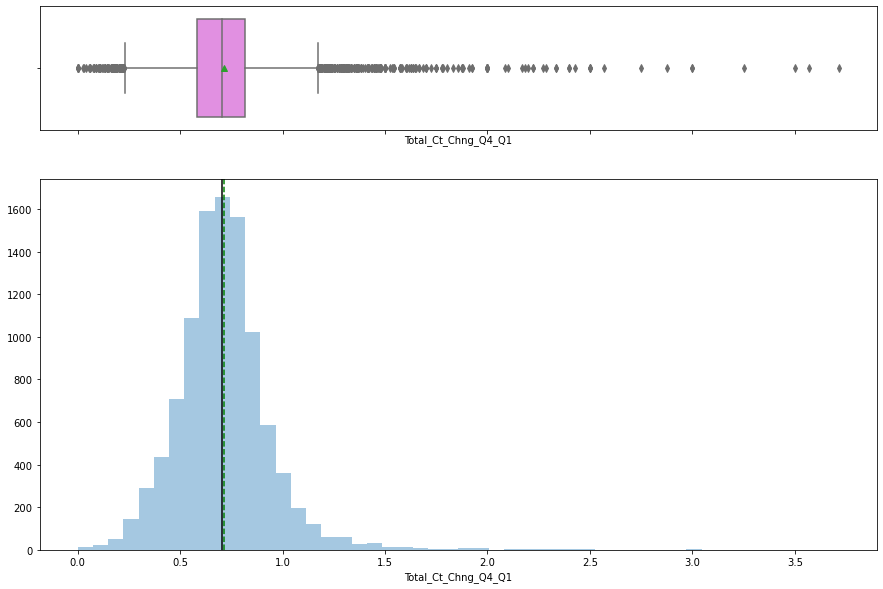

In [26]:
# observations on Total_Trans_Ct
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

- There are outliers to the left and to the right of the mean, although their number seems insignificant and distribution looks mostly normal

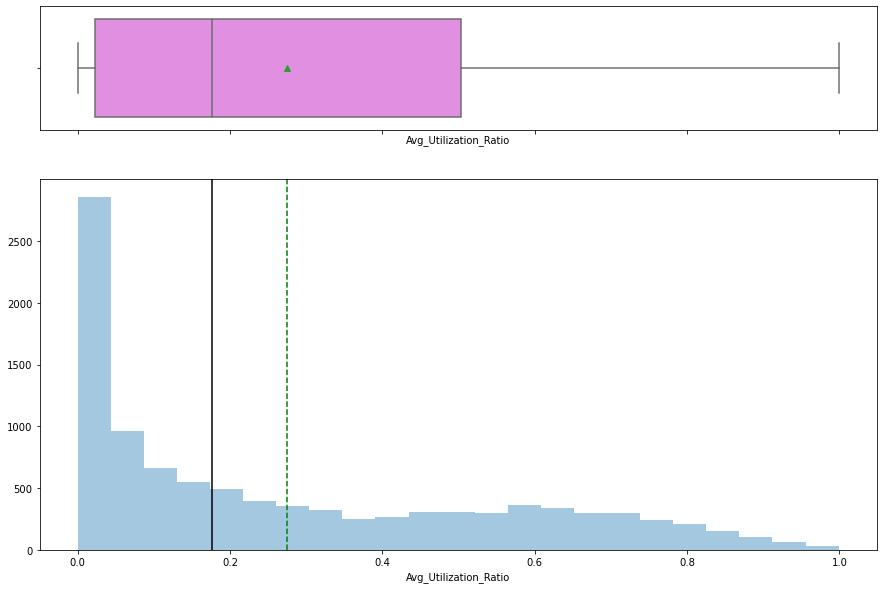

In [27]:
# observations on Avg_Utilization_Ratio
histogram_boxplot(data["Avg_Utilization_Ratio"])

- Data are skewed to the right
- There are no outliers in the column

In [28]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

### Percentage values of categorical columns

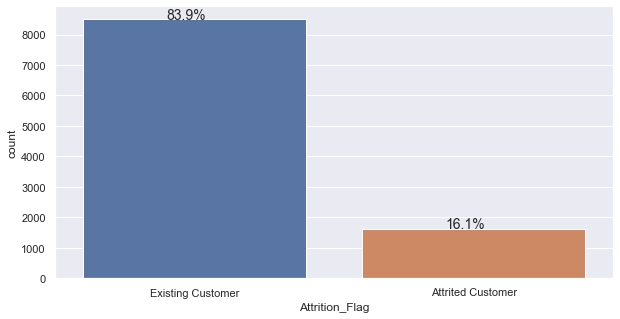

In [29]:
# observations on Attrition_Flag
perc_on_bar(data['Attrition_Flag'])

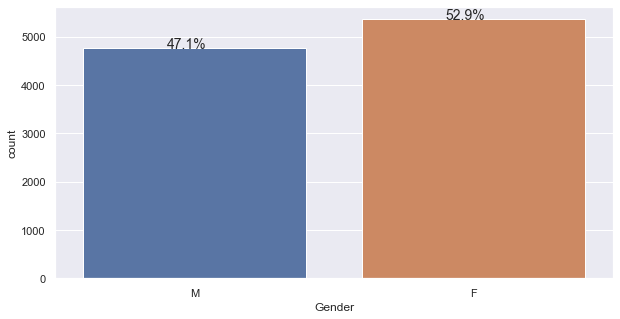

In [30]:
# observations on Gender
perc_on_bar(data['Gender'])

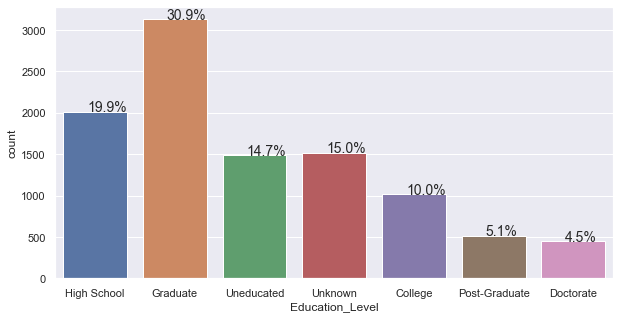

In [31]:
# observations on Education_Level
perc_on_bar(data['Education_Level'])

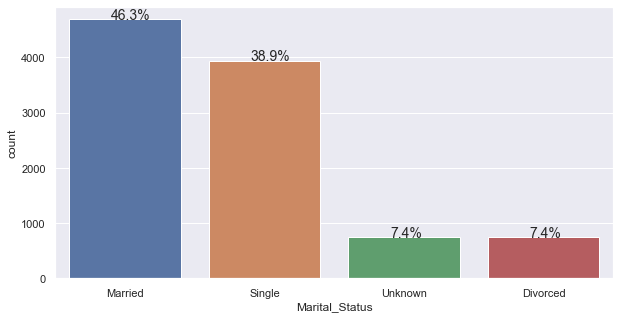

In [32]:
# observations on Marital_Status
perc_on_bar(data['Marital_Status'])

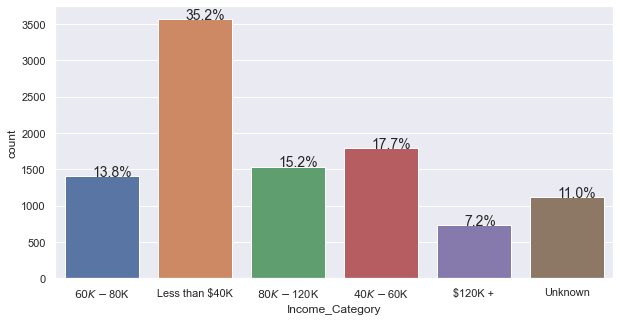

In [33]:
# observations on Income_Category
perc_on_bar(data['Income_Category'])

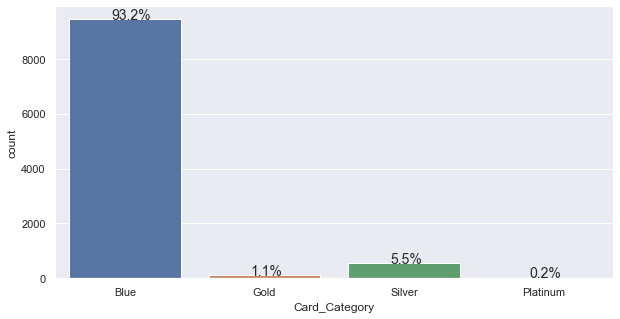

In [34]:
# observations on Card_Category
perc_on_bar(data['Card_Category'])

**Observations**
- Data are unbalanced for the attrition variable with only 16% of data having a 1 in the attrition column
- Most people 93.2% are blue card holders
- A significant amount 35% of people make less than 40k a year
- Almost half of the customers are married.
- More than 30% of customers graduated from a university
- number of female customers is slightly more than male customers (52%)

## Data Preprocessing

* We need to convert values 'Attrited Customer' and 'Existing Customer' to 1 and 0 respectively
* Then we can safely drop the 'Attrition_Flag' column

In [35]:
df = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [36]:
df.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [37]:
data['Attrition'] = df

In [38]:
data['Attrition'].head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [39]:
data.drop(columns = ['Attrition_Flag'], axis = 1, inplace = True)

### Bivariate Analysis

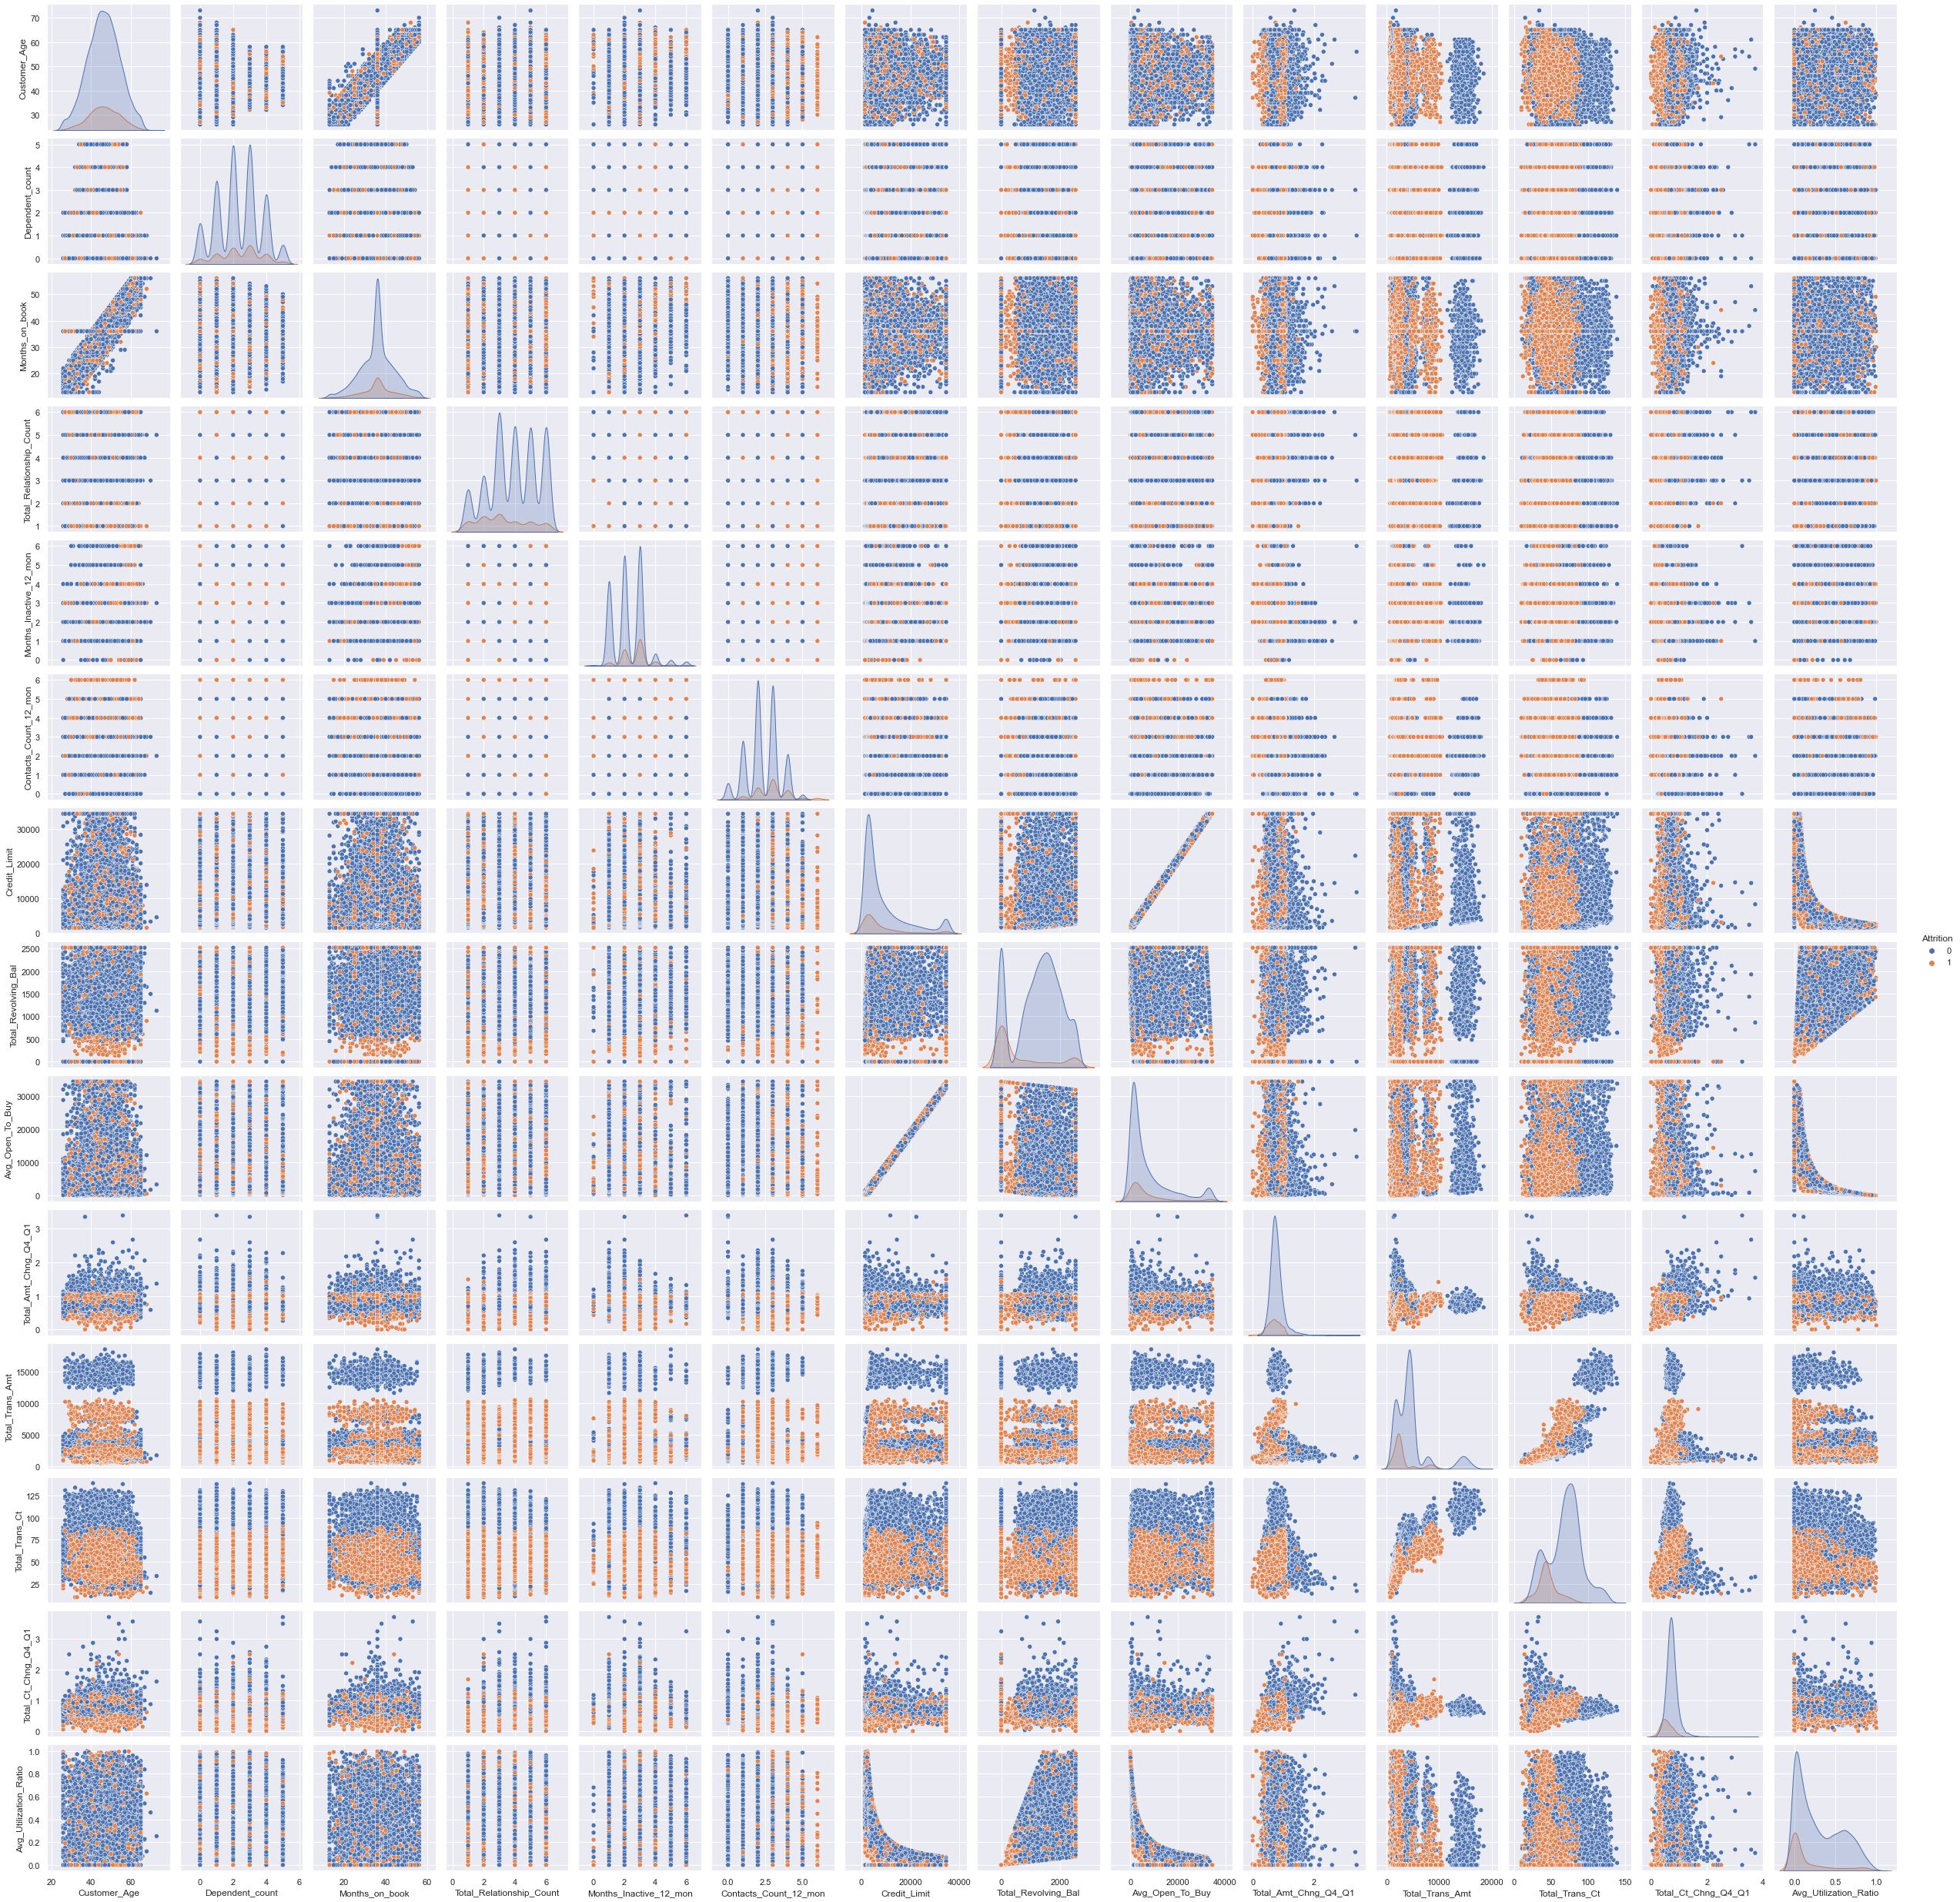

In [40]:
sns.pairplot(data, hue="Attrition")

<AxesSubplot:xlabel='Credit_Limit', ylabel='Avg_Open_To_Buy'>

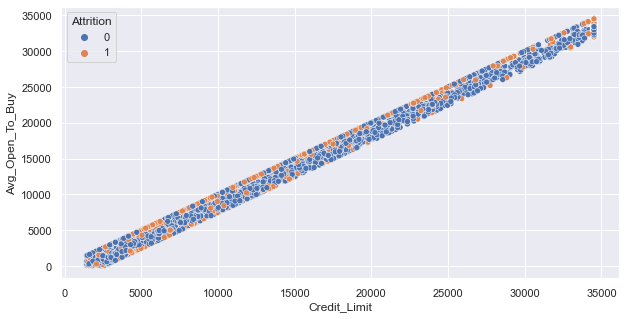

In [41]:
sns.scatterplot(x="Credit_Limit", y = "Avg_Open_To_Buy", data = data, hue="Attrition")

<AxesSubplot:xlabel='Months_on_book', ylabel='Customer_Age'>

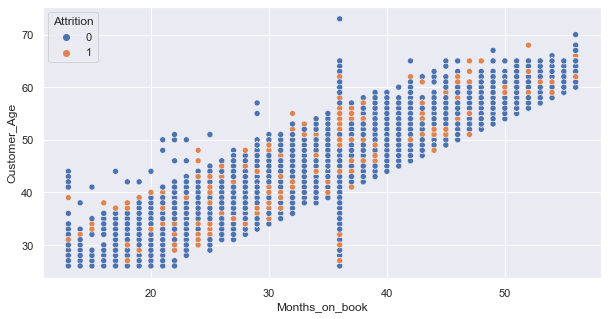

In [42]:
sns.scatterplot(x="Months_on_book", y = "Customer_Age", data = data, hue="Attrition")

<AxesSubplot:xlabel='Income_Category', ylabel='Customer_Age'>

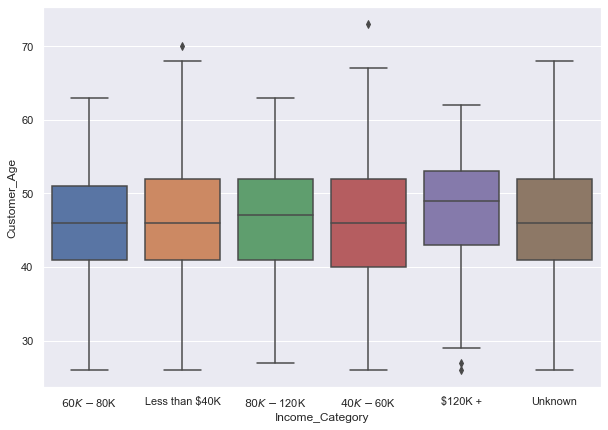

In [44]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Customer_Age", x="Income_Category", data=data, orient="vertical")

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

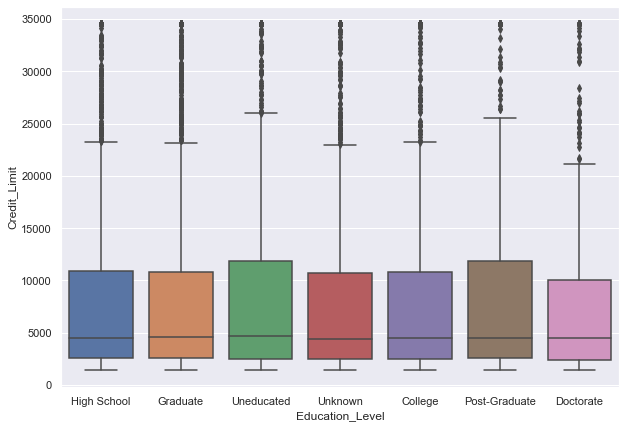

In [45]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Credit_Limit", x="Education_Level", data=data, orient="vertical")

In [46]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition           0     1    All
Education_Level                   
College           859   154   1013
Doctorate         356    95    451
Graduate         2641   487   3128
High School      1707   306   2013
Post-Graduate     424    92    516
Uneducated       1250   237   1487
Unknown          1263   256   1519
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


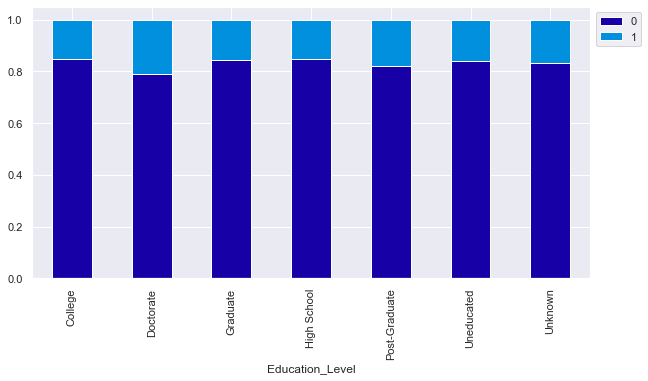

In [47]:
stacked_plot(data["Education_Level"])

Attrition           0     1    All
Income_Category                   
$120K +           601   126    727
$40K - $60K      1519   271   1790
$60K - $80K      1213   189   1402
$80K - $120K     1293   242   1535
Less than $40K   2949   612   3561
Unknown           925   187   1112
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


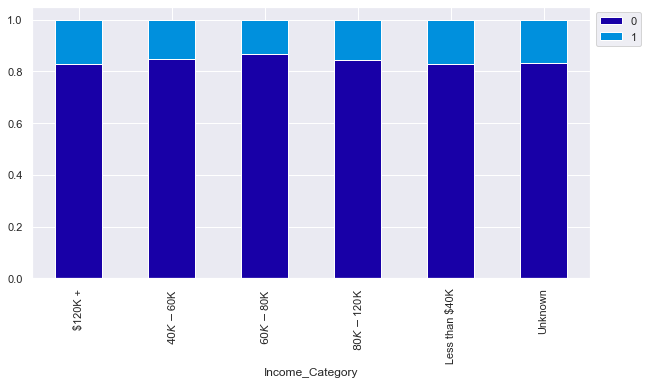

In [48]:
stacked_plot(data["Income_Category"])

Attrition     0     1    All
Gender                      
F          4428   930   5358
M          4072   697   4769
All        8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


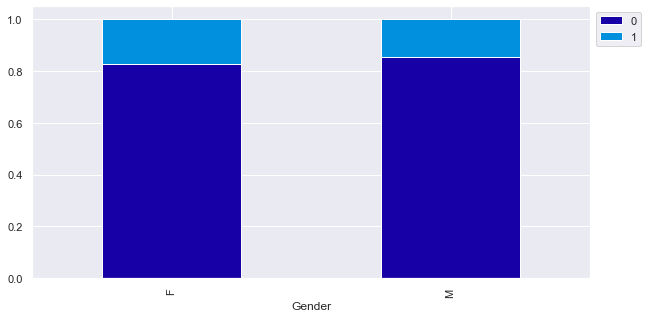

In [49]:
stacked_plot(data["Gender"])

Attrition         0     1    All
Card_Category                   
Blue           7917  1519   9436
Gold             95    21    116
Platinum         15     5     20
Silver          473    82    555
All            8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


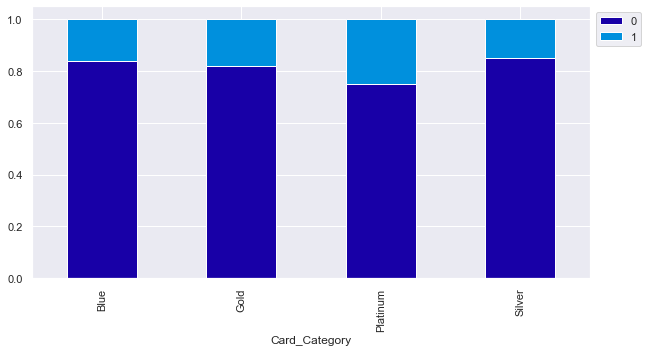

In [50]:
stacked_plot(data["Card_Category"])

**Observations**
- More females seem to have attrited than males
- Among the attrited customers more people seem to hold Platinum card type
- More customers with doctorate education level seem to have attrited 

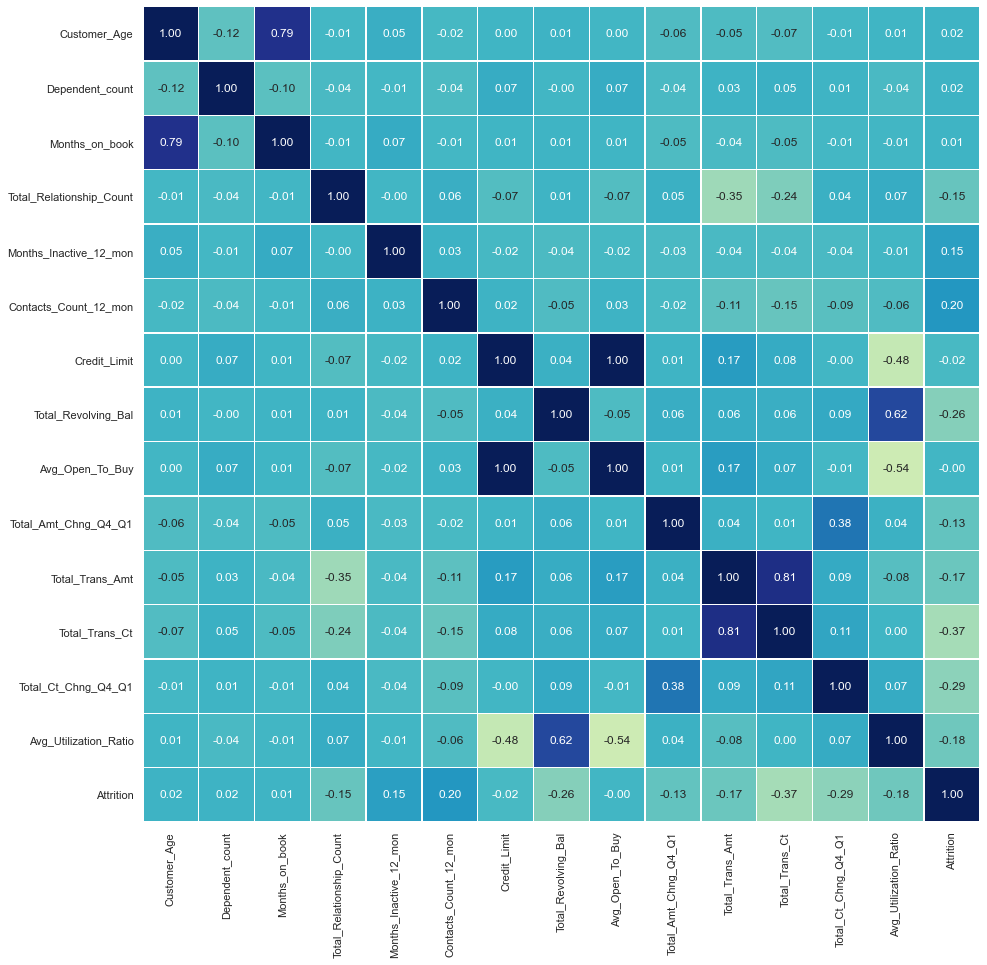

In [51]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

**Observations**


- Attrition doesn't really depend on any of the variables, except for maybe a slight negative correlation with 'Total_Revolving_Bal' a negative 0.37 correlation with 'Total_Trans_Ct', and again a negative 0.29 correlation with 'Total_Ct_Chng_Q4_Q1'
- Months_on_book' has high correlation with 'Customer_Age'
- Total_trans_ct has high correlation (0.81) with Total_trans_Amt
- 'Avg_Utilization_Ratio' has high correlation (0.62) with Total_Revolving_Bal

## Feature Engineering


**Split the data into train and test sets** 

### Outlier treatment

In [52]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

In [53]:
# Separating target variable and other variables
X = data.drop(columns="Attrition")
Y = data["Attrition"]

In [54]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [55]:
Y.nunique()

2

In [56]:
num_cols = X.select_dtypes(['int64', 'float64'])

In [57]:
numeric_cols = num_cols.columns

In [58]:
numeric_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [59]:
for col in num_cols :
    treat_outliers(data, col)

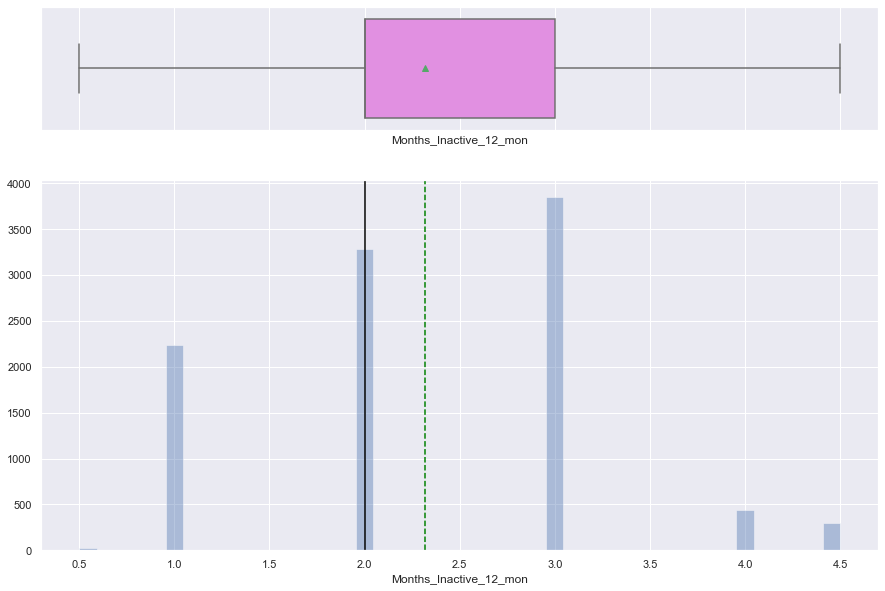

In [60]:
histogram_boxplot(data["Months_Inactive_12_mon"])

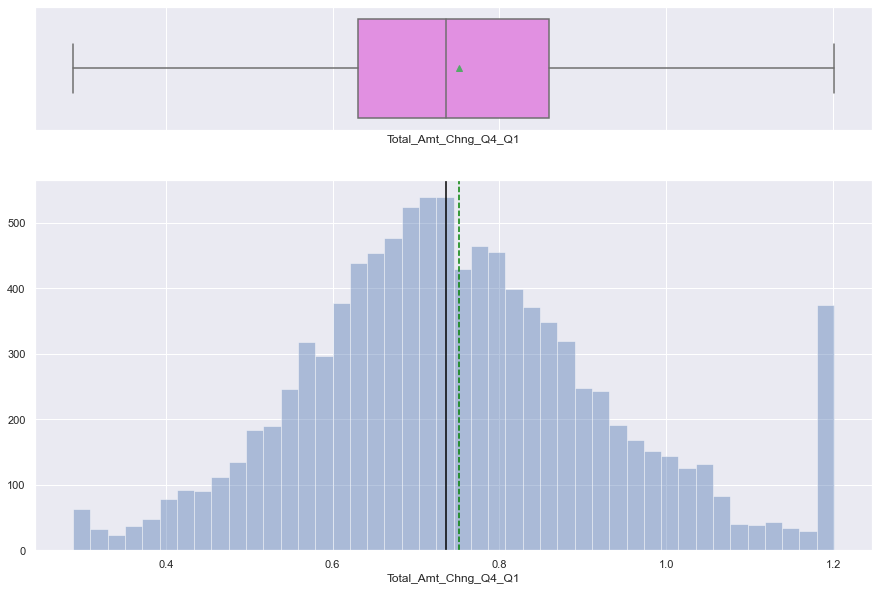

In [61]:
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

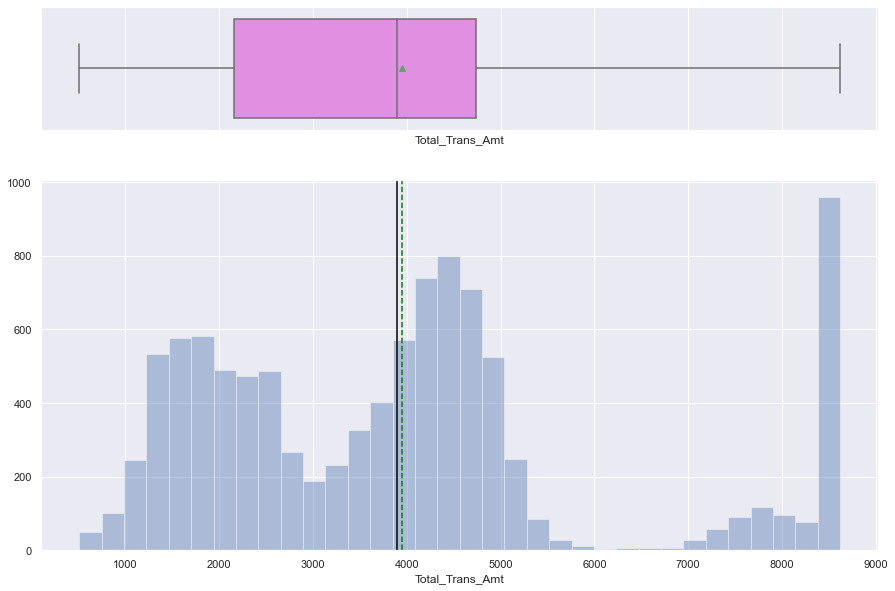

In [62]:
histogram_boxplot(data["Total_Trans_Amt"])

In [63]:
Y.value_counts()

0    8500
1    1627
Name: Attrition, dtype: int64

In [64]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [65]:
y_test.value_counts()

0    2551
1     488
Name: Attrition, dtype: int64

### Encoding categorical varaibles


In [66]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 32) (3039, 32)


## Building the model

### Logistic Regression 

In [86]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

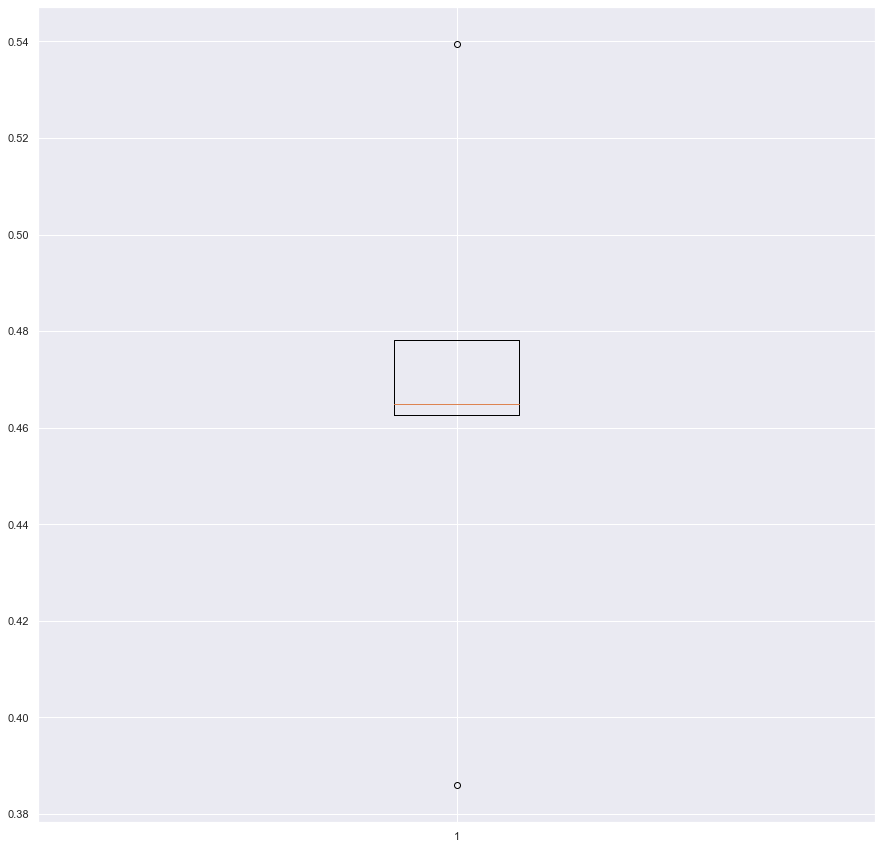

In [87]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

**Observations**
- Train recall lies somewhere between 0.46 and 0.48
- Let's check the performance on test data.

In [89]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model: classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [90]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy on training set :  0.8781038374717833
Accuracy on test set :  0.8789075353734781
Recall on training set :  0.43283582089552236
Recall on test set :  0.430327868852459
Precision on training set :  0.6933895921237694
Precision on test set :  0.7


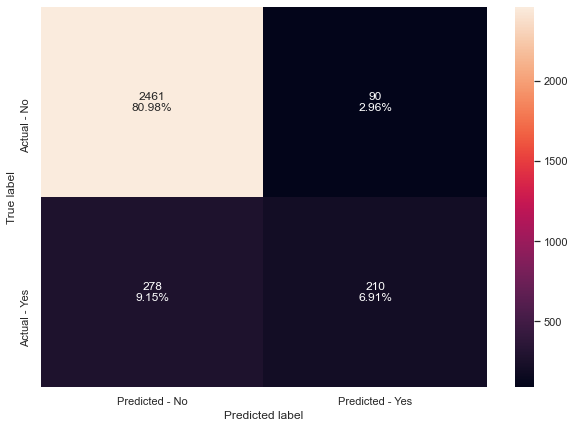

In [91]:
#Calculating different metrics
scores_LR = get_metrics_score(lr)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

* Logistic Regression has given a generalized performance on training and test set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [92]:
import imblearn

In [93]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.8.0


In [94]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 32)
After UpSampling, the shape of train_y: (11898,) 



### Logistic Regression on oversampled data

In [95]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

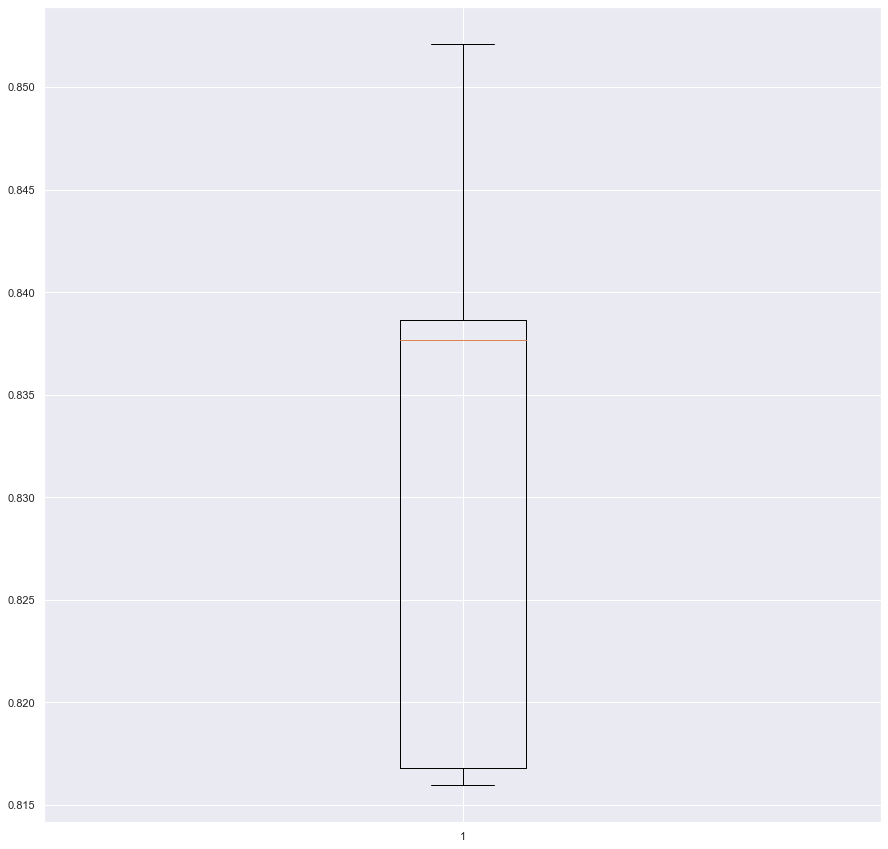

In [96]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.80 to 0.84, which is a significant improvement from the previous model
* Let's check the performance on the test set.

Accuracy on training set :  0.8263261851015802
Accuracy on test set :  0.8078315235274761
Recall on training set :  0.7761194029850746
Recall on test set :  0.7807377049180327
Precision on training set :  0.4752688172043011
Precision on test set :  0.44405594405594406


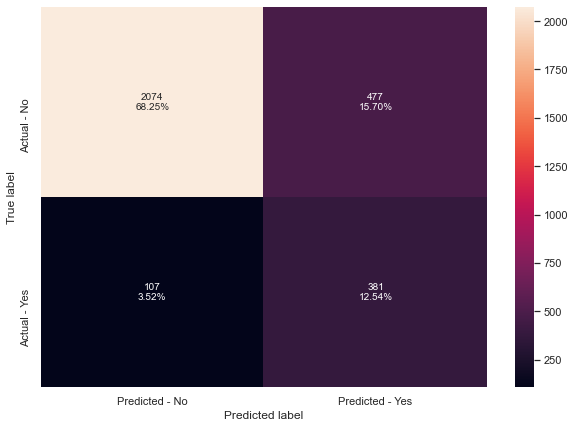

In [102]:
#Calculating different metrics
get_metrics_score(log_reg_over)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

- The test recall is even slightly higher than training recall, the model is able to generalize well
- Let's see if we can do better with Regularization

### Regularization

In [103]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7974040632054176
Accuracy on test set :  0.7857847976307996
Recall on training set :  0.5662862159789289
Recall on test set :  0.5245901639344263
Precision on training set :  0.4064272211720227
Precision on test set :  0.37925925925925924


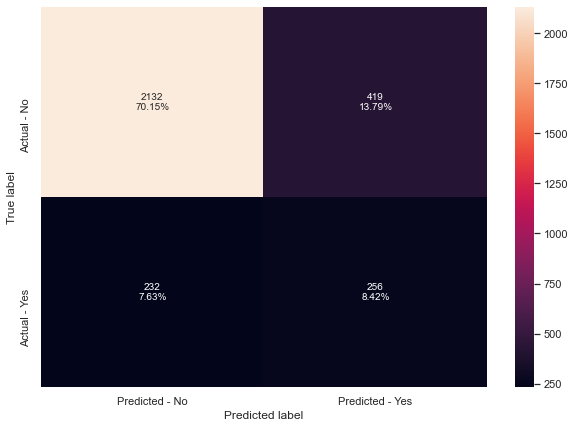

In [105]:
#Calculating different metrics
get_metrics_score(lr_estimator)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

**Observations**
- recall dropped after regularization, didn't really help in our situation
- let us now try undersampling the data

### Undersampling train data using SMOTE

In [106]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [107]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 32)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [108]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

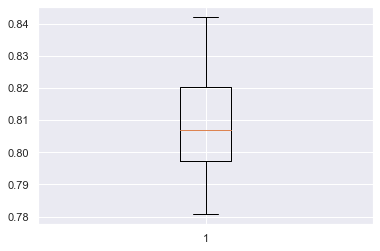

In [109]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

- Recall lies almost in the identical ranges as during oversampling
- Let's check the model performance

Accuracy on training set :  0.8218115124153499
Accuracy on test set :  0.807502467917078
Recall on training set :  0.7998244073748902
Recall on test set :  0.8012295081967213
Precision on training set :  0.4681397738951696
Precision on test set :  0.4448236632536974


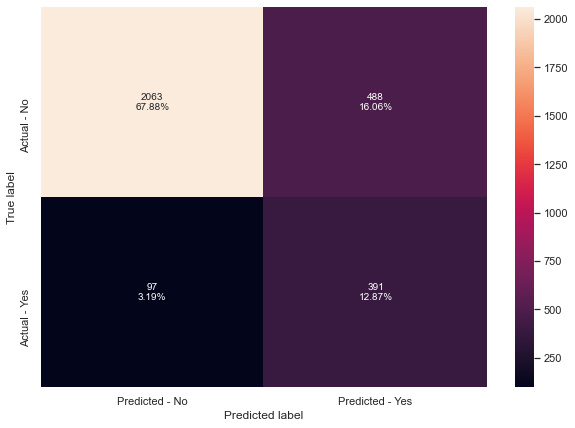

In [111]:
#Calculating different metrics
get_metrics_score(log_reg_under)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

**Observations**
- Train and test recall seem to be close to each other, so undersampling helped
- We should probably stop here, since I am satisfied with recall values

### Building a Pipeline

* We are going to build an array of pipelines with each pipeline having the scaler and model steps.
* The models are: Logistic Regression, Decision tree, Random Forest, Bagging and Boosting, we will also have XGB

In [99]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging_classifier", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 58.64981837854548
RF: 75.76706082386583
Bagging: 81.2980137568591
GBM: 83.75685910812274
ADB: 83.84457840636837
XGB: 86.82935311847902
DTREE: 79.10155344307907


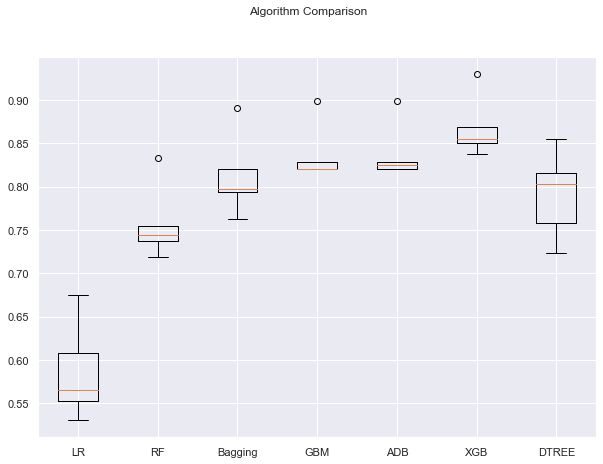

In [100]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

**Observations**
- The 3 best-performing models are XGB, Ada boost and Gradient Boost model.

## Hyperparameter Tuning for 3 best models

## AdaBoost

### GridSearchCV

In [71]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 90} 
Score: 0.8700865600123656
Wall time: 1min 51s


In [72]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9954853273137697
Accuracy on test set :  0.9693978282329714
Recall on training set :  0.9841966637401229
Recall on test set :  0.9016393442622951
Precision on training set :  0.9876651982378855
Precision on test set :  0.9072164948453608


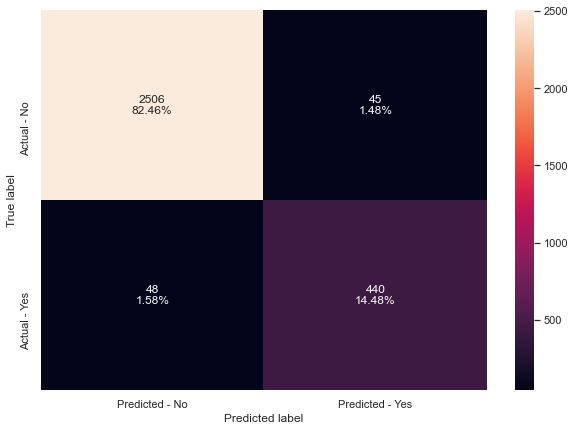

In [73]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

### RandomizedSearchCV

In [74]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8700865600123656:
Wall time: 2min 41s


Accuracy on training set :  0.974539069359087
Accuracy on test set :  0.8954918032786885
Recall on training set :  0.974539069359087
Recall on test set :  0.8954918032786885
Precision on training set :  0.9849157054125999
Precision on test set :  0.9010309278350516


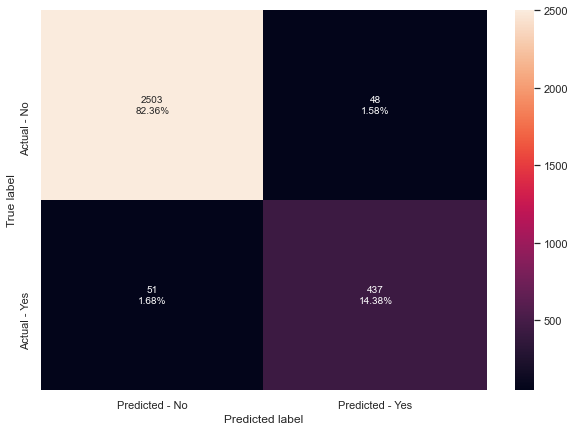

In [124]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

## Gradient Boosting

### GridSearchCV

In [116]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'gradientboostingclassifier__n_estimators':np.arange(50,300,50),
            'gradientboostingclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'gradientboostingclassifier__max_depth':[1, 2, 3]
            }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 200} with CV score=0.8779851611407373:
Wall time: 1min 29s


In [119]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        max_depth=3,
        n_estimators=200,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2, n_estimators=200,
                                            random_state=1))])

Accuracy on training set :  0.9952031602708804
Accuracy on test set :  0.9763079960513327
Recall on training set :  0.9789288849868305
Recall on test set :  0.9200819672131147
Precision on training set :  0.9911111111111112
Precision on test set :  0.9315352697095436


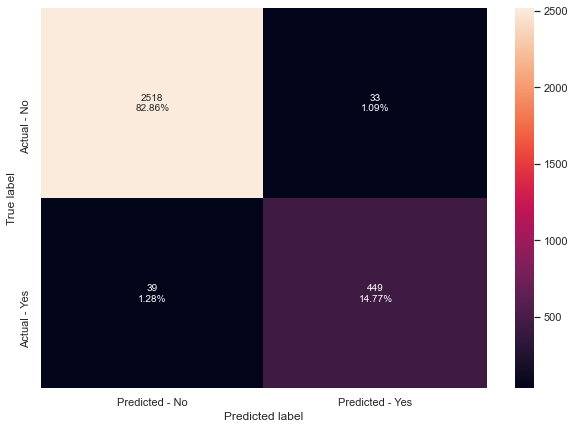

In [120]:
# Calculating different metrics
get_metrics_score(gbc_tuned1)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

### RandomizedSearchCV

In [122]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
#Parameter grid to pass in GridSearchCV
param_grid={'gradientboostingclassifier__n_estimators':np.arange(50,300,50),
            'gradientboostingclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'gradientboostingclassifier__max_depth':[1, 2, 3]
            }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gbc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8700865600123656:
Wall time: 5min 41s


Accuracy on training set :  0.9920983318700615
Accuracy on test set :  0.9180327868852459
Recall on training set :  0.9920983318700615
Recall on test set :  0.9180327868852459
Precision on training set :  0.9947183098591549
Precision on test set :  0.9333333333333333


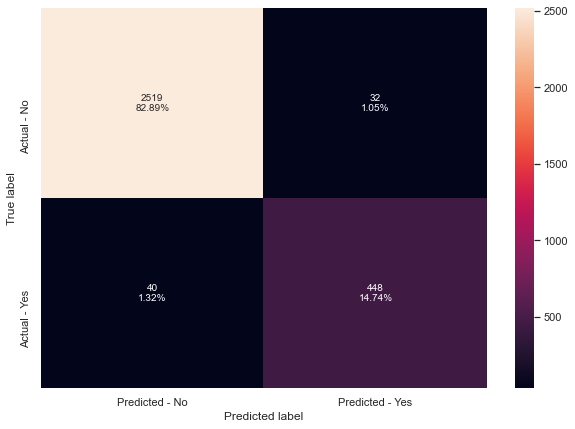

In [123]:
# Calculating different metrics
get_metrics_score(gbc_tuned2)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned2, y_test)

## XGBoost

### GridSearchCV

In [75]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 3, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.8} with CV score=0.9508308215472603:
Wall time: 54min 52s


In [76]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.920852144469526
Accuracy on test set :  0.8979927607765712
Recall on training set :  0.9850746268656716
Recall on test set :  0.9262295081967213
Precision on training set :  0.673469387755102
Precision on test set :  0.6225895316804407


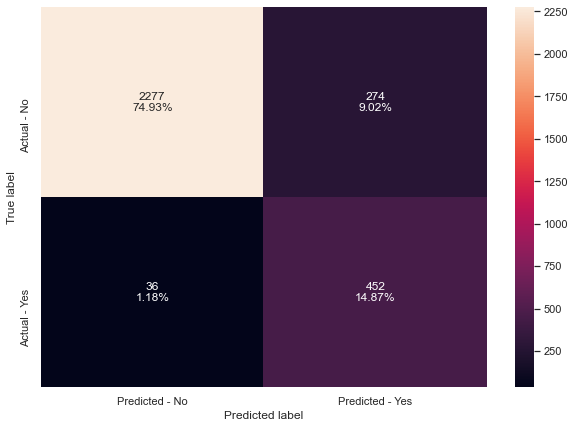

In [77]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

### RandomizedSearchCV

In [78]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 5} with CV score=0.9631385733055104:
Wall time: 2min 25s


In [79]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=200,
                scale_pos_weight=10,
                gamma=1,
                subsample=0.9,
                learning_rate= 0.01,
                eval_metric='logloss', max_depth = 2, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.7602990970654627
Accuracy on test set :  0.7512339585389931
Recall on training set :  0.9675153643546971
Recall on test set :  0.9610655737704918
Precision on training set :  0.3986975397973951
Precision on test set :  0.3888888888888889


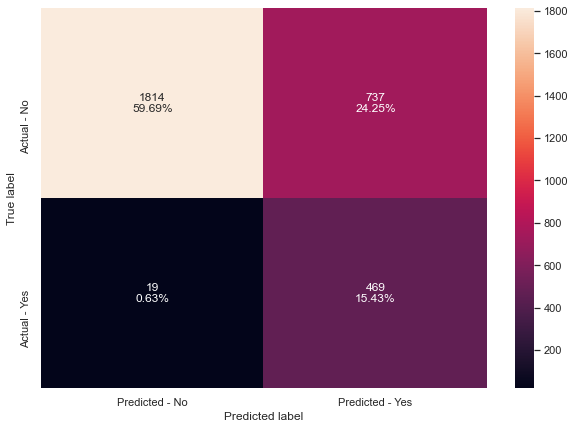

In [80]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

## Comparing all models


In [127]:
# defining list of models
models = [abc_tuned1, abc_tuned2, gbc_tuned1, gbc_tuned2, xgb_tuned1, xgb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [129]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Adaboost with GridSearchCV",
            "Adaboost with RandomizedSearchCV",
            "Gradient Boost with GridSearchCV",
            "Gradient Boost with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
5         XGBoost with RandomizedSearchCV        0.760299       0.751234   
4               XGBoost with GridSearchCV        0.920852       0.897993   
0              Adaboost with GridSearchCV        0.995203       0.976308   
2        Gradient Boost with GridSearchCV        0.995203       0.976308   
3  Gradient Boost with RandomizedSearchCV        0.992098       0.918033   
1        Adaboost with RandomizedSearchCV        0.974539       0.895492   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
5      0.967515     0.961066         0.398698        0.388889  
4      0.985075     0.926230         0.673469        0.622590  
0      0.978929     0.920082         0.991111        0.931535  
2      0.978929     0.920082         0.991111        0.931535  
3      0.992098     0.918033         0.994718        0.933333  
1      0.974539     0.895492         0.984916        0.901031

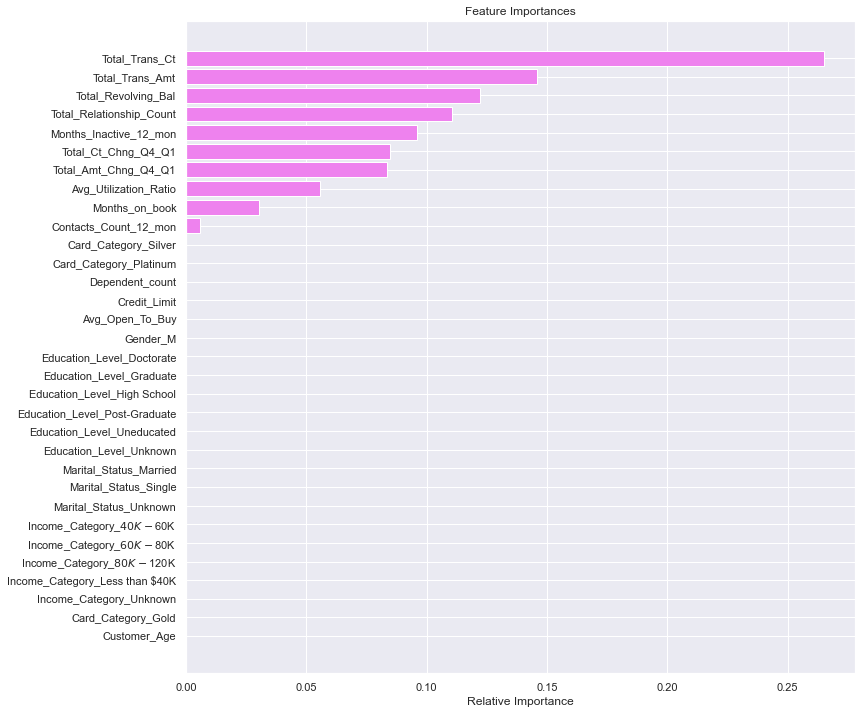

In [130]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Conclusions and Recommendations

- XG Boost model still shows best performance in terms of recall from all of the models in the pipeline. 
- After applying grid search and randomized search the test recall from XG Boost increased even more and was 0.96; however, other metrics have decreased significantly. Seems as though the purpose of XG boosting is focusing on a single metric and  gaining the highest possible value for that metric. AdaBoost and Gradient Boost while having lower values for test recall, managed to keep other metrics on a high level too.
- SMOTE oversampling and undersampling increased the test recall for the Logistic Regression considerably: from 0.43 to 0.79 in both cases. Regularization was not very helpful.
- GridSearch takes a lot of time to complete. When doing grid search on xg boost, I had enought time to watch two back-to-back episodes of my favorite sitcom. It took me about 53 minutes to complete. The randomized search, on the other hand, did not take that much time.
- For AdaBoosting and Gradient Boosting, the grid search did not take nearly as long, however, I should note that for xgboost we had twice as much hyperparameters that we fed to both grid and randomized searches. 

**Business Insights**
- When predicting customer churn, the bank should focus on the following features of a client according to the feature importance diagram above: Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal, Total_Relationship_Count, Months_Inactive_12_mon, changes in total transaction count and amount, average utilization ratio months, months_on_book and the number of contacts with the customer in last 12 months. 
- Other features seem to have no effect on the outcome.
- The aforementioned features all make sense, so the bank should mainly identify: customers whose transaction counts and amounts have decreased in the last 12 months; inactive customers and periods of their inactivity. Having information on the total credit card revolving balance, the average utilization ratio of the credit card and also how long a person had been a customer of the bank would also benefit the managers of the bank.
- Bank managers could focus on contacting the customer who fits the above profile and offer them some win-win deals or credit card campaigns.